<a href="https://colab.research.google.com/github/AnkushRana528/SCT_ML_03/blob/main/SCT_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing SVM using Cats vs Dogs Dataset**


In [4]:
!pip install opencv-python scikit-learn matplotlib


## **Uploading Zipped File Dataset**

In [6]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


## **Unzipping the Uploaded Dataset**

In [9]:
import zipfile
import os

zip_file = 'archive.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("cats_dogs_dataset")
os.listdir("cats_dogs_dataset")[:10]

['dogs_set', 'cats_set']

## **Importing Required Libraries**

In [11]:
import cv2
import numpy as np

image_data = []
labels = []

cats_folder = os.path.join("cats_dogs_dataset", "cats_set")
dogs_folder = os.path.join("cats_dogs_dataset", "dogs_set")

for file in os.listdir(cats_folder):
    file_path = os.path.join(cats_folder, file)

    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        # Resizing the image to 64x64 to reduce computation
        resized_img = cv2.resize(img, (64, 64))

        flattened_img = resized_img.flatten()

        image_data.append(flattened_img)
        labels.append(0)

for file in os.listdir(dogs_folder):
    file_path = os.path.join(dogs_folder, file)

    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:

        resized_img = cv2.resize(img, (64, 64))

        flattened_img = resized_img.flatten()

        image_data.append(flattened_img)
        labels.append(1)

In [12]:
from sklearn.model_selection import train_test_split

# Converting our list of images and labels into NumPy arrays
X = np.array(image_data)
y = np.array(labels)

# Let's split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.svm import SVC

# To Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear')

# To Train the SVM using the training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict labels on the test set
y_pred = svm_model.predict(X_test)

# Print accuracy and detailed classification report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.515

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51        96
           1       0.54      0.50      0.52       104

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200



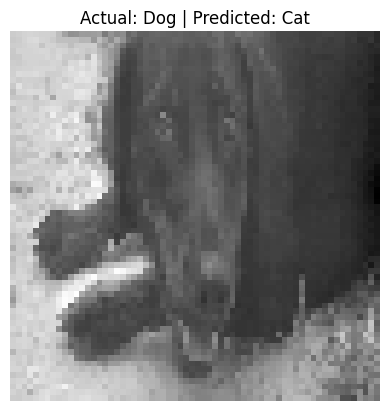

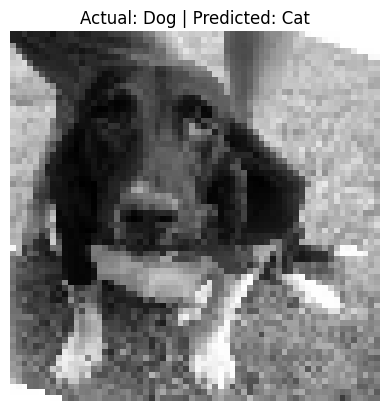

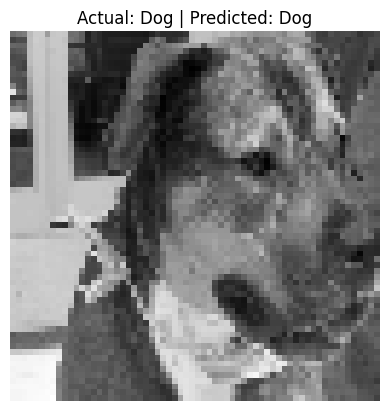

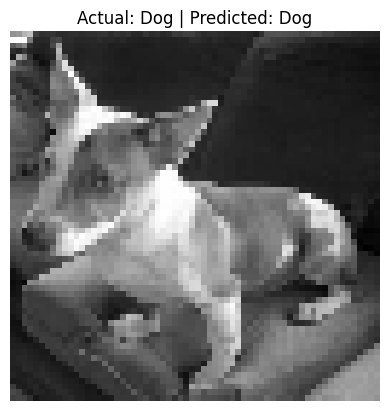

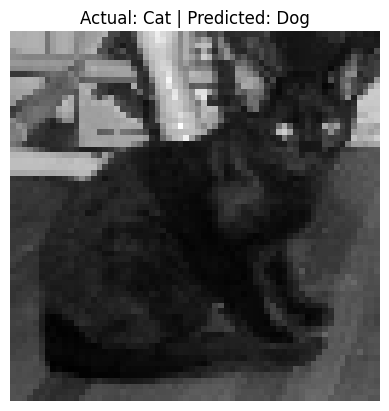

In [15]:
import matplotlib.pyplot as plt

# Show 5 sample predictions with their actual and predicted labels
for i in range(5):
    img = X_test[i].reshape(64, 64)
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {'Dog' if y_test[i]==1 else 'Cat'} | Predicted: {'Dog' if y_pred[i]==1 else 'Cat'}")
    plt.axis('off')
    plt.show()


In [16]:
import joblib

# Save your model for future use
joblib.dump(svm_model, 'svm_cat_dog_model.pkl')


['svm_cat_dog_model.pkl']